## Instacart Basket Analysis: Income, Spending Power, and Department Analysis ##

Additional Charts for Instacart Basket Analysis: Income, Spending Power, and Department Analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Set project path
path = '/Users/jessduong/Documents/CF/Achievement 4_Python'

In [3]:
# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')

In [8]:
# Load final dataset
df_cfo = pd.read_pickle('/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/02 Data/Prepared Data/ords_prods_cust_cfo_FINAL.pkl')
print(f"Loaded dataset: {df_cfo.shape[0]:,} rows, {df_cfo.shape[1]} columns")

Loaded dataset: 30,993,489 rows, 44 columns


In [9]:
print(f"Loaded dataset: {df_cfo.shape[0]:,} rows, {df_cfo.shape[1]} columns")

Loaded dataset: 30,993,489 rows, 44 columns


In [10]:
# Create Customer-Level Summary for Spending Analysis 
# Aggregate to customer level - calculate total spending per customer
customer_spending = df_cfo.groupby('user_id').agg({
    'prices': 'sum',           # Total amount spent on Instacart
    'order_id': 'nunique',     # Number of orders
    'income': 'first',         # Customer income
    'age': 'first',            # Customer age
    'loyalty_flag': 'first',   # Loyalty status
    'region': 'first',         # Region
    'n_dependents': 'first',   # Number of dependents
    'family_status': 'first'   # Family or Single
}).reset_index()

In [11]:
customer_spending.columns = ['user_id', 'total_spending', 'num_orders', 'income', 
                              'age', 'loyalty_flag', 'region', 'n_dependents', 'family_status']

In [12]:
# Calculate mean spending per order
customer_spending['mean_order_value'] = customer_spending['total_spending'] / customer_spending['num_orders']

In [13]:
print(f"Customer-level data: {len(customer_spending):,} unique customers")
customer_spending.head()

Customer-level data: 162,633 unique customers


,user_id,total_spending,num_orders,income,age,loyalty_flag,region,n_dependents,family_status,mean_order_value
0,1,375.7,10,40423,31,New customer,South,3,Family,37.570000
1,2,1465.6,14,64940,68,Regular customer,West,3,Family,104.685714
2,3,721.4,12,93240,33,Regular customer,West,3,Family,60.116667
3,4,147.7,5,45435,31,New customer,South,3,Family,29.540000
4,7,1538.2,20,89095,39,Regular customer,Northeast,2,Family,76.910000


In [14]:
# Analyze Income Distribution
# Check current income group distribution
print("Current Income Distribution:")
print(customer_spending['income'].describe())

Current Income Distribution:
count    162633.000000
mean      95687.144522
std       42743.513896
min       25903.000000
25%       61718.000000
50%       94292.000000
75%      125165.000000
max      593901.000000
Name: income, dtype: float64


In [15]:
print("\nPercentiles:")
for p in [25, 50, 75, 90]:
    print(f"  {p}th percentile: ${customer_spending['income'].quantile(p/100):,.0f}")


Percentiles:
  25th percentile: $61,718
  50th percentile: $94,292
  75th percentile: $125,165
  90th percentile: $152,951


In [16]:
# Create Income Groups
# Using income bins: 0-60k, 60k-120k, 120k+
income_bins = [0, 60000, 120000, customer_spending['income'].max() + 1]
income_labels = ['Low Income', 'Middle Income', 'High Income']

In [17]:
customer_spending['income_group'] = pd.cut(
    customer_spending['income'], 
    bins=income_bins, 
    labels=income_labels)

In [18]:
print("Income Group Distribution:")
print(customer_spending['income_group'].value_counts())
print(f"\nPercentages:")
print((customer_spending['income_group'].value_counts(normalize=True) * 100).round(1))

Income Group Distribution:
income_group
Middle Income    78535
High Income      45292
Low Income       38806
Name: count, dtype: int64

Percentages:
income_group
Middle Income    48.3
High Income      27.8
Low Income       23.9
Name: proportion, dtype: float64


In [19]:
# Create Age Groups
# Create age groups for analysis
age_bins = [0, 35, 55, 100]
age_labels = ['18-35', '36-55', '56+']

In [20]:
customer_spending['age_group'] = pd.cut(
    customer_spending['age'],
    bins=age_bins,
    labels=age_labels)

In [21]:
print("Age Group Distribution:")
print(customer_spending['age_group'].value_counts())

Age Group Distribution:
age_group
56+      65895
36-55    51049
18-35    45689
Name: count, dtype: int64


# CHART 15: Income vs. Spending Power (KEY CHART - Shows the insight)
# This shows that high-income customers spend LESS proportionally on Instacart

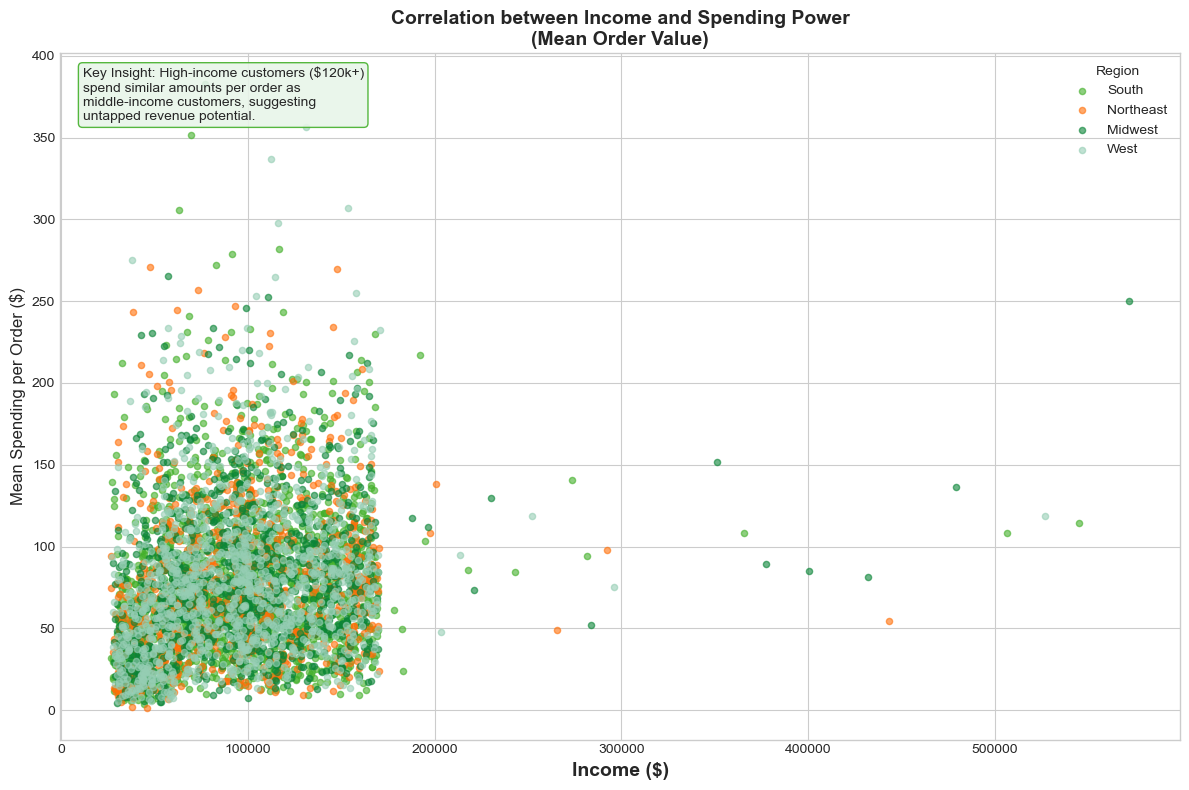

In [22]:
# Chart 15 - Income vs Spending by Region
# Sample data for cleaner visualization
sample_size = 5000
customer_sample = customer_spending.sample(n=min(sample_size, len(customer_spending)), random_state=42)

fig, ax = plt.subplots(figsize=(12, 8))

# Instacart-inspired color palette
region_colors = {
    'South': '#43B02A',     
    'Northeast': '#FF7009',  
    'Midwest': '#0A8537',    
    'West': '#96CEB4'         }

for region in ['South', 'Northeast', 'Midwest', 'West']:
    mask = customer_sample['region'] == region
    ax.scatter(
        customer_sample.loc[mask, 'income'],
        customer_sample.loc[mask, 'mean_order_value'],
        label=region,
        alpha=0.6,
        s=20,
        c=region_colors.get(region, 'gray'))

ax.set_xlabel('Income ($)', fontsize=14, fontweight='bold')
ax.set_ylabel('Mean Spending per Order ($)', fontsize=12)
ax.set_title('Correlation between Income and Spending Power\n(Mean Order Value)', fontsize=14, fontweight='bold')
ax.legend(title='Region', loc='upper right')

# Add insight annotation
textstr = 'Key Insight: High-income customers ($120k+)\nspend similar amounts per order as\nmiddle-income customers, suggesting\nuntapped revenue potential.'
props = dict(boxstyle='round', facecolor='#E8F5E9', alpha=0.9, edgecolor='#43B02A')  
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=props)

plt.tight_layout()

# Save image
plt.savefig('/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/NEW_Income_vs_spending_by_region.png', 
            dpi=150, bbox_inches='tight')
plt.show()

# Chart 16 - Age vs Income (Spending Power)

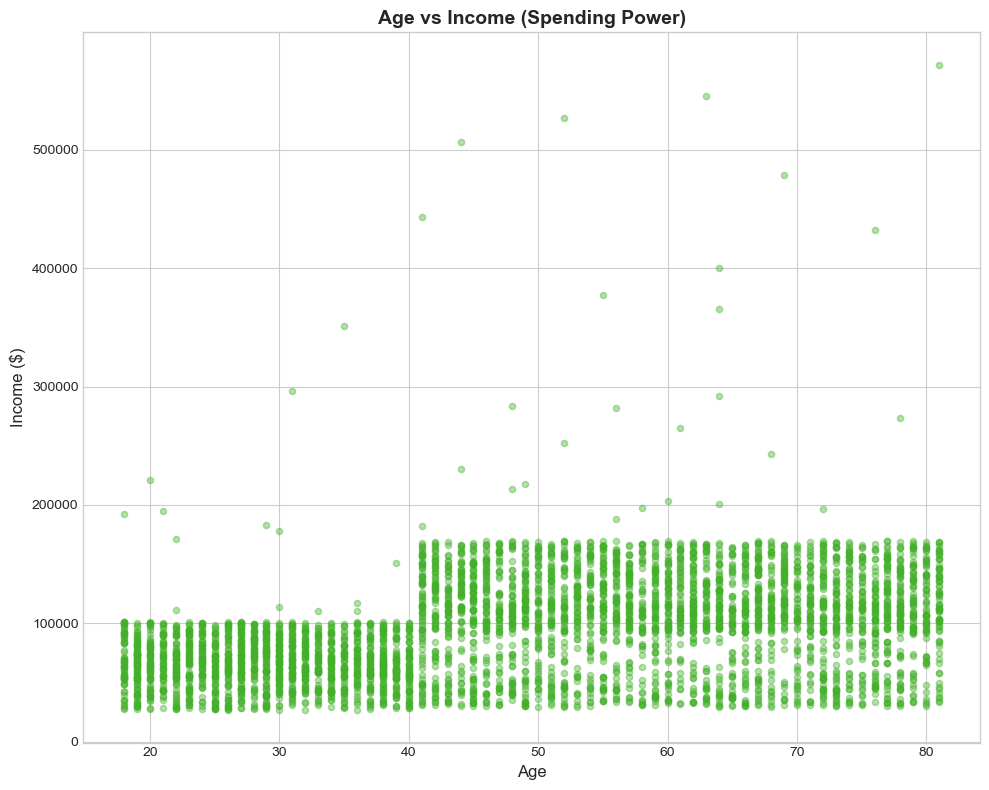

In [23]:
# Chart 16 - Age vs Income (Spending Power)
# Sample for cleaner visualization
sample_size = 5000
customer_sample = customer_spending.sample(n=min(sample_size, len(customer_spending)), random_state=42)

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(
    customer_sample['age'],
    customer_sample['income'],
    alpha=0.4,
    s=20,
    c='#43B02A'  # Instacart green
)

ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Income ($)', fontsize=12)
ax.set_title('Age vs Income (Spending Power)', fontsize=14, fontweight='bold')

plt.tight_layout()

# Save image
plt.savefig('/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/NEW_Age_vs_income.png', 
            dpi=150, bbox_inches='tight')
plt.show()

In [24]:
# Key Analysis - Spending by Income Group
# Calculate mean spending metrics by income group
spending_analysis = customer_spending.groupby('income_group').agg({
    'total_spending': ['mean', 'median', 'sum'],
    'mean_order_value': 'mean',
    'num_orders': 'mean',
    'income': 'mean',
    'user_id': 'count'}).round(2)

/var/folders/85/2tfx5b95721gp7lbbkvhcplw0000gn/T/ipykernel_60783/597990064.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_analysis = customer_spending.groupby('income_group').agg({


In [25]:
spending_analysis.columns = ['Mean Total Spending', 'Median Total Spending', 'Total Revenue',
                             'Mean Order Value', 'Avg # Orders', 'Avg Income', 'Customer Count']

In [26]:
print("Spending Analysis by Income Group:")
print(spending_analysis)

Spending Analysis by Income Group:
               Mean Total Spending  Median Total Spending  Total Revenue  \
income_group                                                               
Low Income                 1059.32                  577.2     41108149.9   
Middle Income              1618.68                  994.4    127123272.2   
High Income                1610.94                  998.8     72962863.7   

               Mean Order Value  Avg # Orders  Avg Income  Customer Count  
income_group                                                               
Low Income                58.51         17.56    45077.91           38806  
Middle Income             84.39         19.25    90192.72           78535  
High Income               84.64         19.23   148576.10           45292  


In [27]:
# Calculate spending as % of income
print("\n--- KEY METRIC: Spending as % of Income ---")
for group in ['Low Income', 'Middle Income', 'High Income']:
    group_data = customer_spending[customer_spending['income_group'] == group]
    avg_income = group_data['income'].mean()
    avg_spending = group_data['total_spending'].mean()
    spending_pct = (avg_spending / avg_income) * 100
    print(f"{group}: Avg Income ${avg_income:,.0f}, Avg Spending ${avg_spending:,.0f}, "f"Spending = {spending_pct:.2f}% of income")


--- KEY METRIC: Spending as % of Income ---
Low Income: Avg Income $45,078, Avg Spending $1,059, Spending = 2.35% of income
Middle Income: Avg Income $90,193, Avg Spending $1,619, Spending = 1.79% of income
High Income: Avg Income $148,576, Avg Spending $1,611, Spending = 1.08% of income


# Prepare department data to create Top and Bottom Departments charts

In [28]:
# Prepare Department Analysis by Customer Type 
# Create loyalty status mapping (adjust based on your loyalty_flag values)
# Assuming loyalty_flag: 'Loyal customer', 'Regular customer', 'New customer'
df_cfo['customer_type'] = df_cfo['loyalty_flag']

In [29]:
# Filter to only Loyal and Regular customers (exclude New for this analysis)
df_loyal_regular = df_cfo[df_cfo['customer_type'].isin(['Loyal customer', 'Regular customer'])].copy()

In [30]:
# Count orders by department and customer type
dept_by_loyalty = df_loyal_regular.groupby(['department', 'customer_type']).size().reset_index(name='num_orders')

In [31]:
# Pivot to get side-by-side comparison
dept_pivot = dept_by_loyalty.pivot(index='department', columns='customer_type', values='num_orders').fillna(0)
dept_pivot['total'] = dept_pivot.sum(axis=1)
dept_pivot = dept_pivot.sort_values('total', ascending=False)

In [32]:
print("Orders by Department and Customer Type:")
print(dept_pivot.head(10))

Orders by Department and Customer Type:
customer_type    Loyal customer  Regular customer    total
department                                                
produce                 3147376           4595293  7742669
dairy eggs              1830707           2596419  4427126
snacks                   943150           1410149  2353299
beverages                855017           1320235  2175252
frozen                   609460           1140000  1749460
pantry                   560402            922727  1483129
bakery                   379873            568851   948724
deli                     324046            521453   845499
canned goods             294594            537284   831878
dry goods pasta          242580            434720   677300


In [33]:
# Chart 17 - Top 5 Departments by Loyal and Regular Customers
# Get top 5 departments
top5_depts = dept_pivot.head(5).index.tolist()[::-1]  # descending order
top5_data = dept_by_loyalty[dept_by_loyalty['department'].isin(top5_depts)]

In [34]:
# Reorder departments by total orders
top5_data['department'] = pd.Categorical(top5_data['department'], categories=top5_depts, ordered=True)
top5_data = top5_data.sort_values('department')

/var/folders/85/2tfx5b95721gp7lbbkvhcplw0000gn/T/ipykernel_60783/1962547886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_data['department'] = pd.Categorical(top5_data['department'], categories=top5_depts, ordered=True)


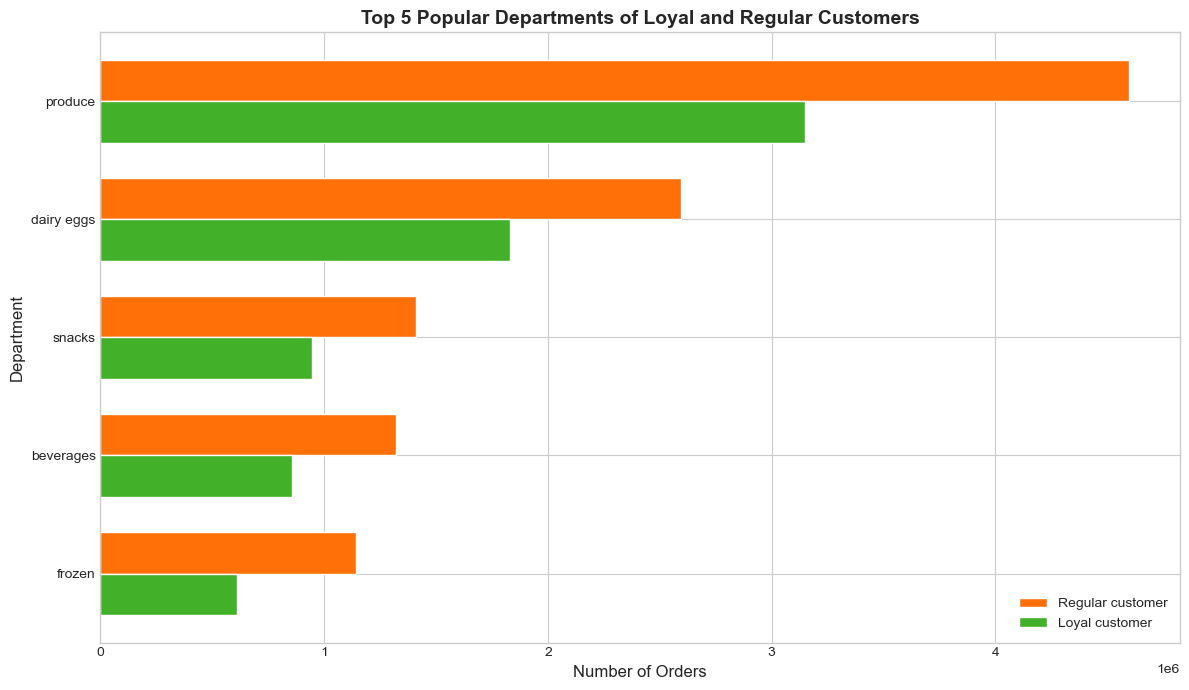

In [35]:
# Chart 17 - Top 5 Departments by Lpyal and Regular Customers
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.35
departments = top5_depts
x = np.arange(len(departments))

# Get values for each customer type
regular_vals = []
loyal_vals = []
for dept in departments:
    reg = top5_data[(top5_data['department'] == dept) & (top5_data['customer_type'] == 'Regular customer')]['num_orders'].values
    loy = top5_data[(top5_data['department'] == dept) & (top5_data['customer_type'] == 'Loyal customer')]['num_orders'].values
    regular_vals.append(reg[0] if len(reg) > 0 else 0)
    loyal_vals.append(loy[0] if len(loy) > 0 else 0)

# Instacart colors: green for loyal, orange for regular
bars1 = ax.barh(x + bar_width/2, regular_vals, bar_width, label='Regular customer', color='#FF7009', edgecolor='white')
bars2 = ax.barh(x - bar_width/2, loyal_vals, bar_width, label='Loyal customer', color='#43B02A', edgecolor='white')

ax.set_yticks(x)
ax.set_yticklabels(departments)
ax.set_xlabel('Number of Orders', fontsize=12)
ax.set_ylabel('Department', fontsize=12)
ax.set_title('Top 5 Popular Departments of Loyal and Regular Customers', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')

# Format x-axis
ax.ticklabel_format(style='scientific', axis='x', scilimits=(6,6))

plt.tight_layout()

# Save image
plt.savefig('/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/NEW_top5_depts_loyal_regular.png', 
            dpi=150, bbox_inches='tight')
plt.show()

# Chart 18 - Bottom 5 Departments

In [36]:
# Chart 18 - Bottom 5 Departments by Loyal and Regular Customers
# Get bottom 5 departments (excluding 'missing' if present)
bottom5_depts = dept_pivot[~dept_pivot.index.isin(['missing'])].tail(5).index.tolist()[::-1]
bottom5_data = dept_by_loyalty[dept_by_loyalty['department'].isin(bottom5_depts)]

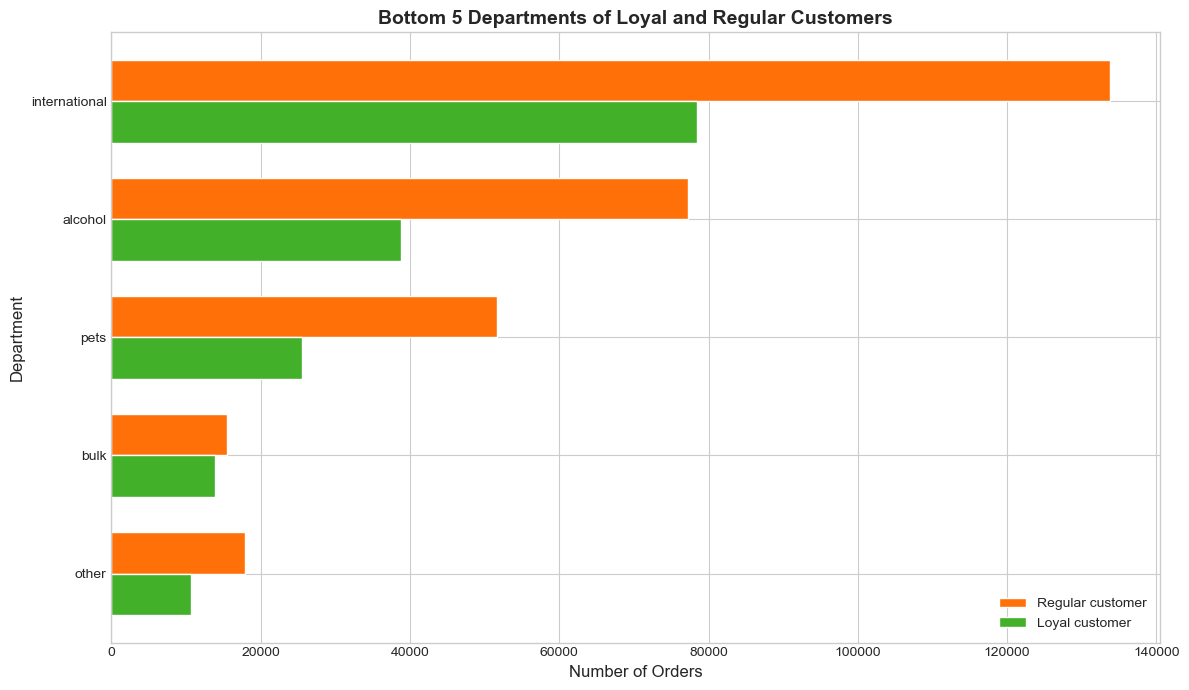

In [37]:
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.35
departments = bottom5_depts
x = np.arange(len(departments))

regular_vals = []
loyal_vals = []
for dept in departments:
    reg = bottom5_data[(bottom5_data['department'] == dept) & (bottom5_data['customer_type'] == 'Regular customer')]['num_orders'].values
    loy = bottom5_data[(bottom5_data['department'] == dept) & (bottom5_data['customer_type'] == 'Loyal customer')]['num_orders'].values
    regular_vals.append(reg[0] if len(reg) > 0 else 0)
    loyal_vals.append(loy[0] if len(loy) > 0 else 0)

# Instacart colors
bars1 = ax.barh(x + bar_width/2, regular_vals, bar_width, label='Regular customer', color='#FF7009', edgecolor='white')
bars2 = ax.barh(x - bar_width/2, loyal_vals, bar_width, label='Loyal customer', color='#43B02A', edgecolor='white')

ax.set_yticks(x)
ax.set_yticklabels(departments)
ax.set_xlabel('Number of Orders', fontsize=12)
ax.set_ylabel('Department', fontsize=12)
ax.set_title('Bottom 5 Departments of Loyal and Regular Customers', fontsize=14, fontweight='bold')
ax.legend(loc='lower right')

plt.tight_layout()

# Save image
plt.savefig('/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/NEW_bottom5_depts_loyal_regular.png', 
            dpi=150, bbox_inches='tight')
plt.show()

# Chart 19: All Departments by Region

In [38]:
# Chart 19 - Number of Orders by Department in Regions
# Get order counts by department and region
dept_region = df_cfo.groupby(['department', 'region']).size().reset_index(name='num_orders')

In [39]:
# Get total by department for sorting
dept_totals = dept_region.groupby('department')['num_orders'].sum().sort_values(ascending=False)
dept_order = dept_totals.index.tolist()[::-1]

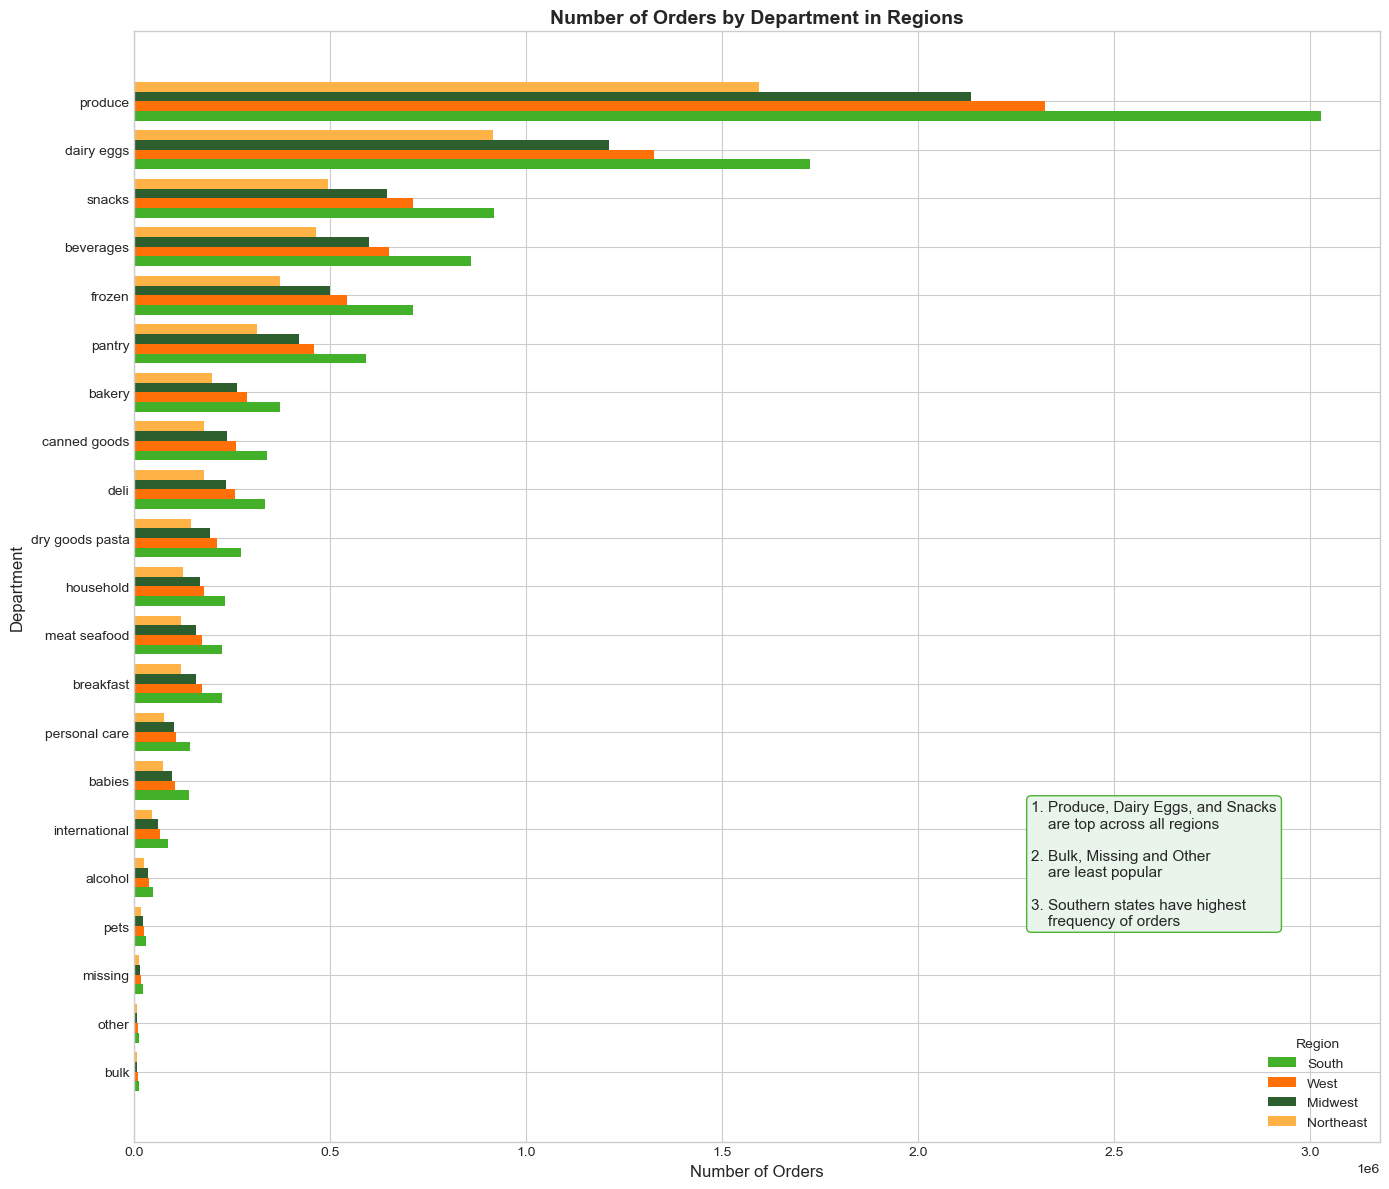

In [40]:
# Chart - Number of Orders by Department in Regions
fig, ax = plt.subplots(figsize=(14, 12))

# Instacart-inspired region colors
region_colors = {
    'South': '#43B02A',      
    'West': '#FF7009',       
    'Midwest': '#2C5F2D',    
    'Northeast': '#FFB347'}

bar_height = 0.2
y = np.arange(len(dept_order))

for i, region in enumerate(['South', 'West', 'Midwest', 'Northeast']):
    region_data = dept_region[dept_region['region'] == region].set_index('department')
    values = [region_data.loc[d, 'num_orders'] if d in region_data.index else 0 for d in dept_order]
    ax.barh(y + i*bar_height, values, bar_height, label=region, color=region_colors[region])

ax.set_yticks(y + 1.5*bar_height)
ax.set_yticklabels(dept_order)
ax.set_xlabel('Number of Orders', fontsize=12)
ax.set_ylabel('Department', fontsize=12)
ax.set_title('Number of Orders by Department in Regions', fontsize=14, fontweight='bold')
ax.legend(title='Region', loc='lower right')

# Add annotation for insights
textstr = '1. Produce, Dairy Eggs, and Snacks\n    are top across all regions\n\n2. Bulk, Missing and Other\n    are least popular\n\n3. Southern states have highest\n    frequency of orders'
props = dict(boxstyle='round', facecolor='#E8F5E9', alpha=0.95, edgecolor='#43B02A')
ax.text(0.72, 0.25, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='center', bbox=props)

plt.tight_layout()

# Save image
plt.savefig('/Users/jessduong/Documents/CF/Achievement 4_Python/12-2025 Instacart Basket Analysis_Jessica_Duong/04 Analysis/Visualizations/NEW_dept_by_region_all.png', 
            dpi=150, bbox_inches='tight')
plt.show()

# Analysis - Bulk Department by Income Group

In [41]:
print("\n" + "="*60)
print("KEY INSIGHT: Bulk Department Analysis by Income Group")
print("="*60)


KEY INSIGHT: Bulk Department Analysis by Income Group


In [42]:
# Filter for bulk department
bulk_orders = df_cfo[df_cfo['department'] == 'bulk'].copy()

In [43]:
if len(bulk_orders) > 0:
    # Add income group to orders
    bulk_orders['income_group'] = pd.cut(
        bulk_orders['income'],
        bins=[0, 60000, 120000, bulk_orders['income'].max() + 1],
        labels=['Low Income', 'Middle Income', 'High Income'])

In [44]:
bulk_by_income = bulk_orders.groupby('income_group').agg({
    'order_id': 'count',
    'user_id': 'nunique'
}).reset_index()
bulk_by_income.columns = ['Income Group', 'Bulk Orders', 'Unique Customers']

/var/folders/85/2tfx5b95721gp7lbbkvhcplw0000gn/T/ipykernel_60783/3879926984.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bulk_by_income = bulk_orders.groupby('income_group').agg({


In [45]:
print("\nBulk Department Orders by Income Group:")
print(bulk_by_income)


Bulk Department Orders by Income Group:
    Income Group  Bulk Orders  Unique Customers
0     Low Income         7302              2315
1  Middle Income        17261              5950
2    High Income         8888              3351


In [46]:
# Compare to overall customer distribution
print("\n--- Comparison: Bulk vs Overall ---")
overall_dist = customer_spending['income_group'].value_counts(normalize=True) * 100
bulk_dist = bulk_by_income.set_index('Income Group')['Bulk Orders']
bulk_dist_pct = (bulk_dist / bulk_dist.sum() * 100).round(1)

print("Income Group | Overall % | Bulk Buyers %")
for group in ['Low Income', 'Middle Income', 'High Income']:
        overall = overall_dist.get(group, 0)
        bulk = bulk_dist_pct.get(group, 0)
        print(f"{group:15} | {overall:6.1f}% | {bulk:6.1f}%")

else: print("No bulk department orders found in dataset")


--- Comparison: Bulk vs Overall ---
Income Group | Overall % | Bulk Buyers %
Low Income      |   23.9% |   21.8%
Middle Income   |   48.3% |   51.6%
High Income     |   27.8% |   26.6%
No bulk department orders found in dataset


In [47]:
# Summary Statistics for Report
print("\n" + "="*60)
print("SUMMARY STATISTICS FOR RECOMMENDATIONS")
print("="*60)

print("\n1. Customer Distribution by Income Group:")
print(customer_spending['income_group'].value_counts())

print("\n2. Mean Spending by Income Group:")
print(customer_spending.groupby('income_group')['total_spending'].mean().round(2))

print("\n3. Spending as % of Income by Group:")
for group in ['Low Income', 'Middle Income', 'High Income']:
    data = customer_spending[customer_spending['income_group'] == group]
    pct = (data['total_spending'].mean() / data['income'].mean()) * 100
    print(f"   {group}: {pct:.2f}%")

print("\n4. Top 5 Departments Overall:")
print(df_cfo['department'].value_counts().head(5))

print("\n5. Bottom 5 Departments Overall:")
print(df_cfo['department'].value_counts().tail(5))


SUMMARY STATISTICS FOR RECOMMENDATIONS

1. Customer Distribution by Income Group:
income_group
Middle Income    78535
High Income      45292
Low Income       38806
Name: count, dtype: int64

2. Mean Spending by Income Group:
income_group
Low Income       1059.32
Middle Income    1618.68
High Income      1610.94
Name: total_spending, dtype: float64

3. Spending as % of Income by Group:
   Low Income: 2.35%


/var/folders/85/2tfx5b95721gp7lbbkvhcplw0000gn/T/ipykernel_60783/3008282271.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(customer_spending.groupby('income_group')['total_spending'].mean().round(2))


   Middle Income: 1.79%
   High Income: 1.08%

4. Top 5 Departments Overall:
department
produce       9079276
dairy eggs    5177183
snacks        2766406
beverages     2571901
frozen        2121732
Name: count, dtype: int64

5. Bottom 5 Departments Overall:
department
alcohol    144627
pets        93060
missing     64768
other       34411
bulk        33451
Name: count, dtype: int64
